In [146]:
import pandas as pd
import numpy as np
import os

## Create Data

In [147]:
# #create empty data frame
# golf_df = pd.DataFrame()

In [154]:
# #add outlook
# golf_df['Outlook'] = ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 
#                      'overcast', 'sunny', 'sunny', 'rainy', 'sunny', 'overcast',
#                      'overcast', 'rainy']

# #add temperature
# golf_df['Temperature'] = ['hot', 'hot', 'hot', 'mild', 'cool', 'cool', 'cool',
#                          'mild', 'cool', 'mild', 'mild', 'mild', 'hot', 'mild']

# #add humidity
# golf_df['Humidity'] = ['high', 'high', 'high', 'high', 'normal', 'normal', 'normal',
#                       'high', 'normal', 'normal', 'normal', 'high', 'normal', 'high']

# #add windy
# golf_df['Windy'] = ['false', 'true', 'false', 'false', 'false', 'true', 'true',
#                    'false', 'false', 'false', 'true', 'true', 'false', 'true']

# #finally add play
# golf_df['Play'] = ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 
#                   'yes', 'yes', 'no']


# #Print/show the new data
# print(golf_df)

In [155]:
os.chdir('C:/Users/user/Desktop/Classification/Ann/DecisionTree/')

In [156]:
golf_data = pd.read_csv('weather.nominal.csv')
golf_data.head()

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [229]:
feature_cols = ['outlook', 'temperature', 'humidity', 'windy', 'play']

## Data Wrangling

In [201]:
# import the library
from sklearn import preprocessing


In [209]:
golf_data = golf_data.apply(preprocessing.LabelEncoder().fit_transform)

In [210]:
golf_data.head()

,outlook,temperature,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1


In [211]:
y =  golf_data['play']

y.head()

0    0
1    0
2    1
3    1
4    1
Name: play, dtype: int32

In [212]:
X = golf_data.drop('play', 1)
X.head()

,outlook,temperature,humidity,windy
0,2,1,0,0
1,2,1,0,1
2,0,1,0,0
3,1,2,0,0
4,1,0,1,0


## Data Split

In [216]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

## Build Decesion Tree

In [217]:
# The decision tree classifier.
clf = tree.DecisionTreeClassifier()
# Training the Decision Tree
clf_train = clf.fit(X_train,y_train)

In [218]:
# pedict the model

#Predict the response for test dataset
y_pred = clf.predict(X_test)

## Model Evaluation

In [220]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [219]:
# Model Accuracy, how well the model performs
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5


In [222]:
print(classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         4

    accuracy                           0.50         4
   macro avg       0.50      0.25      0.33         4
weighted avg       1.00      0.50      0.67         4



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [263]:
dot_data = tree.export_graphviz(clf_train, out_file=None,  
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True)

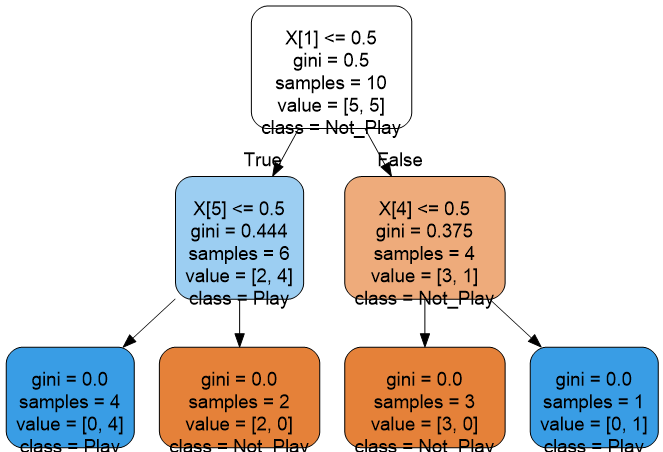

In [264]:
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# using onehotencoding

In [ ]:
os.chdir('C:/Users/user/Desktop/Classification/Ann/DecisionTree/')

In [236]:
golf_data = pd.read_csv('weather.nominal.csv')
golf_data.head()

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [237]:
one_hot_data = pd.get_dummies(golf_df[ ['Outlook', 'Temperature', 'Humidity', 'Windy'] ] , drop_first = True)
#print the new dummy data
one_hot_data

,Outlook_rainy,Outlook_sunny,Temperature_hot,Temperature_mild,Humidity_normal,Windy_true
0,0,1,1,0,0,0
1,0,1,1,0,0,1
2,0,0,1,0,0,0
3,1,0,0,1,0,0
4,1,0,0,0,1,0
5,1,0,0,0,1,1
6,0,0,0,0,1,1
7,0,1,0,1,0,0
8,0,1,0,0,1,0
9,1,0,0,1,1,0


In [238]:
data = pd.concat([golf_data['play'],one_hot_data],axis=1)
data.head(4)

,play,Outlook_rainy,Outlook_sunny,Temperature_hot,Temperature_mild,Humidity_normal,Windy_true
0,no,0,1,1,0,0,0
1,no,0,1,1,0,0,1
2,yes,0,0,1,0,0,0
3,yes,1,0,0,1,0,0


In [239]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [240]:
out = le.fit_transform(data['play'])
out = pd.DataFrame(out)

In [241]:
df = pd.concat([data,out],axis=1)
df.head(4)

,play,Outlook_rainy,Outlook_sunny,Temperature_hot,Temperature_mild,Humidity_normal,Windy_true,0
0,no,0,1,1,0,0,0,0
1,no,0,1,1,0,0,1,0
2,yes,0,0,1,0,0,0,1
3,yes,1,0,0,1,0,0,1


In [242]:
# rename the column names
df.rename(columns={0:'Play'}, inplace=True)
df

,play,Outlook_rainy,Outlook_sunny,Temperature_hot,Temperature_mild,Humidity_normal,Windy_true,Play
0,no,0,1,1,0,0,0,0
1,no,0,1,1,0,0,1,0
2,yes,0,0,1,0,0,0,1
3,yes,1,0,0,1,0,0,1
4,yes,1,0,0,0,1,0,1
5,no,1,0,0,0,1,1,0
6,yes,0,0,0,0,1,1,1
7,no,0,1,0,1,0,0,0
8,yes,0,1,0,0,1,0,1
9,yes,1,0,0,1,1,0,1


In [243]:
del df['play']

In [244]:
df.head()

,Outlook_rainy,Outlook_sunny,Temperature_hot,Temperature_mild,Humidity_normal,Windy_true,Play
0,0,1,1,0,0,0,0
1,0,1,1,0,0,1,0
2,0,0,1,0,0,0,1
3,1,0,0,1,0,0,1
4,1,0,0,0,1,0,1


## Data Split

In [245]:
y = df['Play']


In [246]:
X= df.iloc[:,: -1].values # remove the last variable alone
X= pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,0,1,1,0,0,0
1,0,1,1,0,0,1
2,0,0,1,0,0,0
3,1,0,0,1,0,0
4,1,0,0,0,1,0


In [247]:
#renaem the column names
X.columns =['Outlook_rainy', 'Outlook_sunny','Temperature_hot','Temperature_mild','Humidity_normal','Windy_true']
X.head()

,Outlook_rainy,Outlook_sunny,Temperature_hot,Temperature_mild,Humidity_normal,Windy_true
0,0,1,1,0,0,0
1,0,1,1,0,0,1
2,0,0,1,0,0,0
3,1,0,0,1,0,0
4,1,0,0,0,1,0


In [248]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: Play, dtype: int32

In [249]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( 
        X, y, test_size = 0.25, random_state = 0) 

## Build Decision Tree

In [250]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

import pydotplus
import pydot
from IPython.display import Image

from IPython import display
from sklearn import datasets, utils, tree
from sklearn.externals.six import StringIO  

In [254]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)


# Training the Decision Tree
clf_train = clf.fit(xtrain, ytrain)

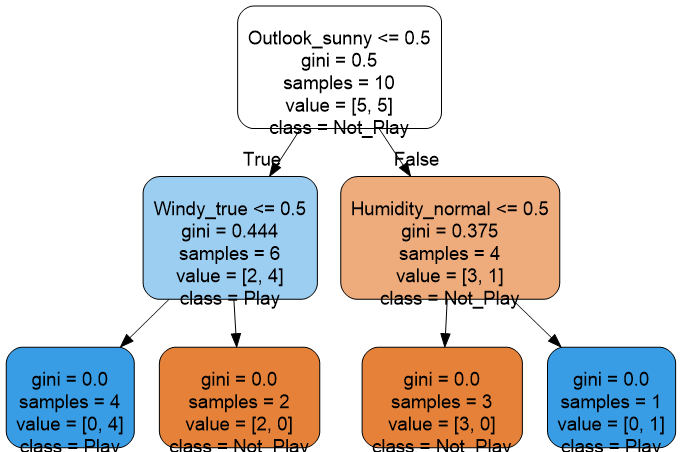

In [255]:
#Create Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

### predict the model

In [258]:
# Predicting the Test set results
y_pred = clf_train.predict(xtest)

In [259]:
# Making the Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
cm

array([[0, 0],
       [2, 2]], dtype=int64)

In [260]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Precision:",metrics.precision_score(ytest, y_pred))
print("Recall:",metrics.recall_score(ytest, y_pred))

Accuracy: 0.5
Precision: 1.0
Recall: 0.5


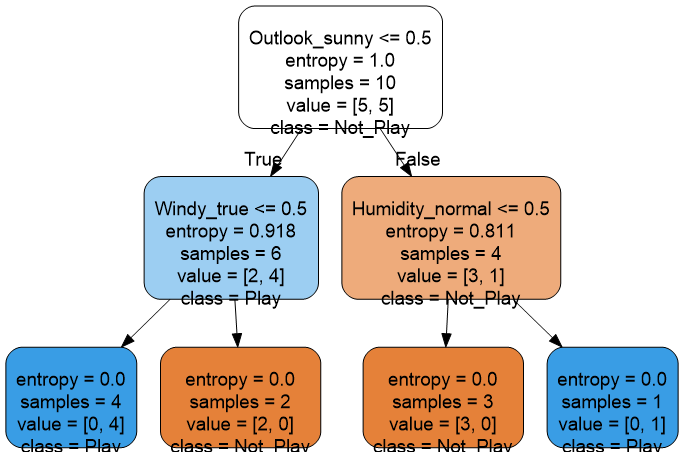

In [190]:
# Export/Print a decision tree in DOT format.
#print(tree.export_graphviz(clf_train, None))

#Create Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(one_hot_data.columns.values), 
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True) #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())